In [1]:
# Multiple classifiers on KDD

In [2]:
import pandas as pd
import numpy as np
import sys
import xgboost
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

/home/manero/DL/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#Learning Curve
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Automatically created module for IPython interactive environment


In [4]:
#Confusion matrix
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)


In [5]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# KDDTrain+.csv & KDDTest+.csv are the datafiles without the the difficulty score
df=pd.read_csv('./NSL-KDD/KDDTrain+.txt', header=None, names= col_names, index_col=False )
df_test=pd.read_csv('./NSL-KDD/KDDTest+.txt', header=None, names= col_names, index_col=False)
# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


/tmp/ipykernel_5867/607970981.py:13: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df=pd.read_csv('./NSL-KDD/KDDTrain+.txt', header=None, names= col_names, index_col=False )
/tmp/ipykernel_5867/607970981.py:14: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_test=pd.read_csv('./NSL-KDD/KDDTest+.txt', header=None, names= col_names, index_col=False)


In [6]:
# first five rows
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:

print('Types of attacks in Training set:')
print(df['label'].value_counts())
print()
print('Types of attacks in Test set:')
print(df_test['label'].value_counts())

Types of attacks in Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Types of attacks in Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       17

In [8]:
# explore categorical features in Training set
print('Distribution of Categorical Features in Training set:')
for col in df.columns:
    if df[col].dtypes == 'object' :
      cat_col = len(df[col].unique())
      print(" The Feature '{col}' has {cat_col} categories".format(col=col, cat_col=cat_col))

Distribution of Categorical Features in Training set:
 The Feature 'protocol_type' has 3 categories
 The Feature 'service' has 70 categories
 The Feature 'flag' has 11 categories
 The Feature 'label' has 23 categories


In [9]:
#Explorin test set
print('Distribution of Categorical Features in Test set:')
for col in df_test.columns:
    if df[col].dtypes == 'object' :
      cat_col = len(df_test[col].unique())
      print(" The Feature '{col}' has {cat_col} categories".format(col=col, cat_col=cat_col))

Distribution of Categorical Features in Test set:
 The Feature 'protocol_type' has 3 categories
 The Feature 'service' has 64 categories
 The Feature 'flag' has 11 categories
 The Feature 'label' has 38 categories


In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
print(df_categorical_values.head())
print(testdf_categorical_values.head())

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
  protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO


In [11]:
# Creating the dummy columns for protocol type in order to work with it later with One hot encoding
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# Creating the dummy columns for service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# Creating the dummy columns for flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols_train=unique_protocol2 + unique_service2 + unique_flag2
print(len(dumcols_train))

#do same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
dumcols_test=unique_protocol2 + unique_service2_test + unique_flag2
print(len(dumcols_test))

84
78


In [12]:
# Label Encoding on protocol_ type, service , and flag in Training dataset 
df_categorical_values_LabelEnc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_LabelEnc.head())
# Label Encoding on protocol_ type, service , and flag in test set
testdf_categorical_values_LabelEnc=testdf_categorical_values.apply(LabelEncoder().fit_transform)
print(testdf_categorical_values_LabelEnc.head())


   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


In [13]:
OneEnc = OneHotEncoder(categories='auto')
# One Hot Encoding on Training set
df_categorical_values_OneEnc = OneEnc.fit_transform(df_categorical_values_LabelEnc)
df_cat_data = pd.DataFrame(df_categorical_values_OneEnc.toarray(),columns=dumcols_train)
# One Hot Encoding on Test set
testdf_categorical_values_OneEnc = OneEnc.fit_transform(testdf_categorical_values_LabelEnc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_OneEnc.toarray(),columns=dumcols_test)

print(df_cat_data.head())
print(testdf_cat_data.head())

   Protocol_type_icmp  Protocol_type_tcp  Protocol_type_udp  service_IRC  \
0                 0.0                1.0                0.0          0.0   
1                 0.0                0.0                1.0          0.0   
2                 0.0                1.0                0.0          0.0   
3                 0.0                1.0                0.0          0.0   
4                 0.0                1.0                0.0          0.0   

   service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0          0.0             0.0          0.0           0.0          0.0   
1          0.0             0.0          0.0           0.0          0.0   
2          0.0             0.0          0.0           0.0          0.0   
3          0.0             0.0          0.0           0.0          0.0   
4          0.0             0.0          0.0           0.0          0.0   

   service_courier  ...  flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  \
0              0.

In [14]:
trainservice=df['service'].unique()
testservice=df_test['service'].unique()
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
print(" The list of the difference of the columns between trining set and test set are ",difference)

 The list of the difference of the columns between trining set and test set are  ['service_http_8001', 'service_http_2784', 'service_aol', 'service_red_i', 'service_harvest', 'service_urh_i']


In [15]:
#Filling the extra column with zeros
for col in difference:
    testdf_cat_data[col] = 0

print(testdf_cat_data.shape)
print(df_cat_data.shape)

(22544, 84)
(125973, 84)


In [16]:
# Joining the dummy columns in Training Dataset
Final_df=df.join(df_cat_data)
Final_df.drop('flag', axis=1, inplace=True)
Final_df.drop('protocol_type', axis=1, inplace=True)
Final_df.drop('service', axis=1, inplace=True)

# Joining the dummy columns with Test Dataset

Final_df_test=df_test.join(testdf_cat_data)
Final_df_test.drop('flag', axis=1, inplace=True)
Final_df_test.drop('protocol_type', axis=1, inplace=True)
Final_df_test.drop('service', axis=1, inplace=True)

print(Final_df.shape)
print(Final_df_test.shape)

(125973, 123)
(22544, 123)


In [17]:
attacks = {
		'normal': 0,
    
    'back': 1,
    'land': 1,
    'neptune': 1,
    'pod': 1,
    'smurf': 1,
    'teardrop': 1,
    'mailbomb': 1,
    'apache2': 1,
    'processtable': 1,
    'udpstorm': 1,
    
    'ipsweep': 2,
    'nmap': 2,
    'portsweep': 2,
    'satan': 2,
    'mscan': 2,
    'saint': 2,

    'ftp_write': 3,
    'guess_passwd': 3,
    'imap': 3,
    'multihop': 3,
    'phf': 3,
    'spy': 3,
    'warezclient': 3,
    'warezmaster': 3,
    'sendmail': 3,
    'named': 3,
    'snmpgetattack': 3,
    'snmpguess': 3,
    'xlock': 3,
    'xsnoop': 3,
    'worm': 3,
    
    'buffer_overflow': 4,
    'loadmodule': 4,
    'perl': 4,
    'rootkit': 4,
    'httptunnel': 4,
    'ps': 4,    
    'sqlattack': 4,
    'xterm': 4
}

In [18]:
# Assigning numeric values to the labels(types of attacks)
Final_df['label'] = Final_df['label'].apply(lambda x: attacks[x] if x in attacks else None)
Final_df_test['label'] = Final_df_test['label'].apply(lambda x: attacks[x] if x in attacks else None)

In [19]:
print(Final_df['label'].unique())
print(Final_df_test['label'].unique())

[0 1 3 2 4]
[1 0 2 3 4]


In [20]:
X_Train = Final_df.drop('label',axis=1)
Y_Train = Final_df.label
X_Test = Final_df_test.drop('label',axis=1)
Y_Test = Final_df_test.label

In [21]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_Train)
X_Train=scaler1.transform(X_Train) 
scaler2 = preprocessing.StandardScaler().fit(X_Test)
X_Test=scaler2.transform(X_Test) 

In [22]:
##############################  Decision Tree ###############################

In [26]:
from sklearn.model_selection import cross_validate

clf_dtree=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None, max_features=None, max_leaf_nodes=None,min_samples_leaf=1, min_samples_split=2, 
                                 min_weight_fraction_leaf=0.0,random_state=123, splitter='best')
print("****Decision Tree****")
clf_dtree.fit(X_Train, Y_Train)

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'f1_macro':'f1_macro',
           'rec_macro': 'recall_macro'}
scores = cross_validate(clf_dtree, X_Test, Y_Test, cv=10, scoring=scoring,return_train_score=True)
print("Accuracy: %0.5f" % (scores['test_acc']).mean())
print("Precision: %0.5f" % (scores['test_prec_macro']).mean())
print("Recall: %0.5f" % (scores['test_rec_macro']).mean())
print("F-measure: %0.5f" % (scores['test_f1_macro']).mean())

Y_Pred = cross_val_predict(clf_dtree, X_Test, Y_Test, cv=10)

****Decision Tree****
Accuracy: 0.98274
Precision: 0.96153
Recall: 0.95890
F-measure: 0.95951


In [27]:
from sklearn.utils.multiclass import unique_labels
print(unique_labels(Y_Pred))
print(unique_labels(Y_Test))

[0 1 2 3 4]
[0 1 2 3 4]


Confusion matrix, without normalization
[[9548   18   28  106   11]
 [  18 7430    8    2    0]
 [  28    3 2386    1    3]
 [ 126    2    2 2615    9]
 [   8    0    4   12  176]]


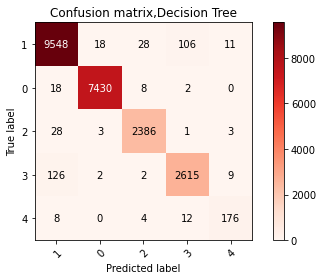

In [28]:
class_names=Y_Test.unique()
# Plot confusion matrix
plot_confusion_matrix(Y_Test, Y_Pred, classes=class_names,
                      title='Confusion matrix,Decision Tree')
plt.show()

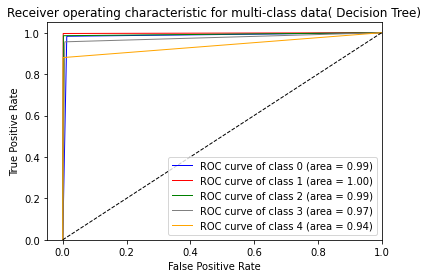

In [29]:
#ROC Curve
y_bin = label_binarize(Y_Test, classes=[0, 1, 2,3,4])
n_classes = y_bin.shape[1]

pipe= Pipeline([('scaler', StandardScaler()), ('clf',clf_dtree )])

y_score = cross_val_predict(pipe, X_Test, Y_Test, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green','grey','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data( Decision Tree)')
plt.legend(loc="lower right")
plt.show()

<module 'matplotlib.pyplot' from '/home/manero/DL/lib/python3.8/site-packages/matplotlib/pyplot.py'>

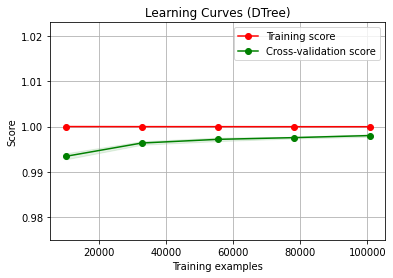

In [30]:
####Learning curve generation
title = "Learning Curves (DTree)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf_dtree, title, X_Train, Y_Train, ylim=(0.975, 1.023), cv=cv, n_jobs=4)

In [31]:
############################# RANDOM FOREST #####################################

In [32]:
clf_RF=RandomForestClassifier(criterion='entropy',random_state = 5, max_depth = 50,n_estimators = 250, min_samples_split = 5, min_samples_leaf = 1)
clf_RF.fit(X_Train, Y_Train)
print("****Random Forest****")
scores = cross_validate(clf_RF, X_Test, Y_Test, cv=10, scoring=scoring,return_train_score=True)
print("Accuracy: %0.5f" % (scores['test_acc']).mean())
print("Precision: %0.5f" % (scores['test_prec_macro']).mean())
print("Recall: %0.5f" % (scores['test_rec_macro']).mean())
print("F-measure: %0.5f" % (scores['test_f1_macro']).mean())

Y_Pred = cross_val_predict(clf_RF, X_Test, Y_Test, cv=10)

****Random Forest****
Accuracy: 0.98572
Precision: 0.97383
Recall: 0.96218
F-measure: 0.96744


Confusion matrix, without normalization
[[9590    5   14   97    5]
 [  16 7439    3    0    0]
 [  25    2 2394    0    0]
 [ 122    0    2 2622    8]
 [  10    0    0   13  177]]


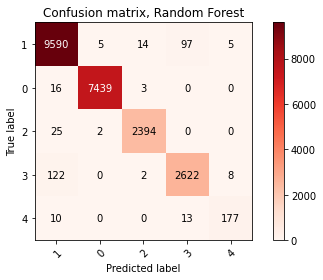

In [33]:
class_names=Y_Test.unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_Test, Y_Pred, classes=class_names,
                      title='Confusion matrix, Random Forest')
plt.show()


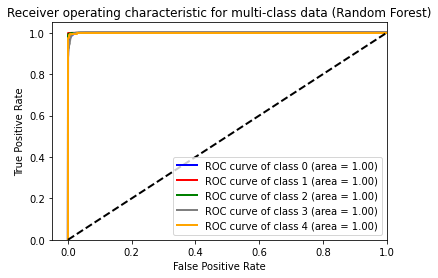

In [34]:
#ROC Curve
y_bin = label_binarize(Y_Test, classes=[0, 1, 2,3,4])
n_classes = y_bin.shape[1]

pipe= Pipeline([('scaler', StandardScaler()), ('clf',clf_RF )])
y_score = cross_val_predict(pipe, X_Test, Y_Test, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green','grey','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
####Learning curve generation
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf_RF, title, X_Train, Y_Train, ylim=(0.975, 1.023), cv=cv, n_jobs=4)

In [ ]:
########################### Logistic Regession ###########################

In [ ]:
clf_LR=LogisticRegression(random_state=0,solver='lbfgs', multi_class='auto',max_iter=2000)
clf_LR.fit(X_Train, Y_Train)
print("****Logistic Regression****")
scores = cross_validate(clf_LR, X_Test, Y_Test, cv=10, scoring=scoring,return_train_score=True)
print("Accuracy: %0.5f" % (scores['test_acc']).mean())
print("Precision: %0.5f" % (scores['test_prec_macro']).mean())
print("Recall: %0.5f" % (scores['test_rec_macro']).mean())
print("F-measure: %0.5f" % (scores['test_f1_macro']).mean())

Y_Pred = cross_val_predict(clf_LR, X_Test, Y_Test, cv=10)

In [ ]:
class_names=Y_Test.unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_Test, Y_Pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [ ]:
#ROC Curve
y_bin = label_binarize(Y_Test, classes=[0, 1, 2,3,4])
n_classes = y_bin.shape[1]

pipe= Pipeline([('scaler', StandardScaler()), ('clf',clf_LR )])
# or
#clf = OneVsRestClassifier(LogisticRegression())
#pipe= Pipeline([('scaler', StandardScaler()), ('clf', clf)])
y_score = cross_val_predict(pipe, X_Test, Y_Test, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green','grey','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
####Learning curve generation
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf_LR, title, X_Train, Y_Train, ylim=(0.975, 1.023), cv=cv, n_jobs=4)

In [ ]:
############################ XGBOOST ########################################

In [ ]:
clf_XGB=xgboost.XGBClassifier(learning_rate =0.01, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
clf_XGB.fit(X_Train, Y_Train)
print("****XGBoost****")
scores = cross_validate(clf_XGB, X_Test, Y_Test, cv=10, scoring=scoring,return_train_score=True)
print("Accuracy: %0.5f" % (scores['test_acc']).mean())
print("Precision: %0.5f" % (scores['test_prec_macro']).mean())
print("Recall: %0.5f" % (scores['test_rec_macro']).mean())
print("F-measure: %0.5f" % (scores['test_f1_macro']).mean())

Y_Pred = cross_val_predict(clf_XGB, X_Test, Y_Test, cv=10)

In [ ]:
class_names=Y_Test.unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_Test, Y_Pred, classes=class_names,
                      
                      title='Confusion matrix, without normalization')

plt.show()


In [ ]:
#ROC Curve
y_bin = label_binarize(Y_Test, classes=[0, 1, 2,3,4])
n_classes = y_bin.shape[1]

pipe= Pipeline([('scaler', StandardScaler()), ('clf',clf_XGB )])
y_score = cross_val_predict(pipe, X_Test, Y_Test, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green','grey','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data(XGBOOST)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
####Learning curve generation
title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf_XGB, title, X_Train, Y_Train, ylim=(0.975, 1.023), cv=cv, n_jobs=4)

In [ ]:
################################ Naive Bayes ############################

In [ ]:
clf_NB=MultinomialNB()
clf_NB.fit(X_Train, Y_Train)
print("****Naive Bayes****")
scores = cross_validate(clf_NB, X_Test, Y_Test, cv=10, scoring=scoring,return_train_score=True)
print("Accuracy: %0.5f" % (scores['test_acc']).mean())
print("Precision: %0.5f" % (scores['test_prec_macro']).mean())
print("Recall: %0.5f" % (scores['test_rec_macro']).mean())
print("F-measure: %0.5f" % (scores['test_f1_macro']).mean())

Y_Pred = cross_val_predict(clf_NB, X_Test, Y_Test, cv=10)

In [ ]:
class_names=Y_Test.unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_Test, Y_Pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()


In [ ]:
#ROC Curve
y_bin = label_binarize(Y_Test, classes=[0, 1, 2,3,4])
n_classes = y_bin.shape[1]

pipe= Pipeline([('clf',clf_NB )])
y_score = cross_val_predict(pipe, X_Test, Y_Test, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green','grey','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
####Learning curve generation
title = "Learning Curves (NB)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf_NB, title, X_Train, Y_Train, ylim=(0.3,0.9), cv=cv, n_jobs=4)

In [ ]:
#EOF